In [1]:
import os
import glob
import shutil
import re

import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns

import json
import scipy.stats as spstats

In [2]:
from pipeline.python import utils as putils
from pipeline.python.classifications import aggregate_data_stats as aggr
from pipeline.python.classifications import experiment_classes as util


/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/experiment_classes.py:18: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
   

/home/julianarhee/Repositories/2p-pipeline/pipeline/python/paradigm/tifs_to_data_arrays.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.st

In [3]:
%matplotlib notebook

# Set meatdata params

In [4]:
rootdir = '/n/coxfs01/2p-data'

#### Set trace ID and FOV/state type
traceid = 'traces001'
fov_type = 'zoom2p0x'
state = 'awake'
aggregate_dir = '/n/coxfs01/julianarhee/aggregate-visual-areas'

#### Preprocessing params
responsive_test = 'ROC'
responsive_thr = .05
n_stds = 0
responsive_str = '-'.join([responsive_test, str(responsive_thr), str(n_stds)])
trace_type = 'df'


#### Set outputdir for current analysis
vardir = os.path.join(aggregate_dir, 'variability')
if not os.path.exists(vardir):
    os.makedirs(vardir)
print("... saving output to base dir:\n%s" % vardir)

#### Create data ID for labeling figures with data-types
data_id = '%s_%s_%s' % (traceid, trace_type, responsive_str)
print("DATA ID: %s" % data_id)

... saving output to base dir:
/n/coxfs01/julianarhee/aggregate-visual-areas/variability
DATA ID: traces001_df_ROC-0.05-0


In [5]:
# Get all data sets
sdata = aggr.get_aggregate_info(traceid=traceid, fov_type=fov_type, state=state)

/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/get_dataset_stats.py:17: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to u'nbAgg' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/juliana

# Select 1 dataset

In [12]:
# animalid = 'JC117'
# session = '20191105'
animalid = 'JC113'
session = '20191018'

# animalid = 'JC084'
# session = '20190522'
fov = 'FOV1_zoom2p0x'
stimulus = 'blobs'
soma_fpath = glob.glob(os.path.join(rootdir, animalid, session, fov, '*%s*' % stimulus, 'traces', '%s*' % traceid,
                                    'data_arrays', 'np_subtracted.npz'))[0]
print(soma_fpath)

fig_id = '%s_%s_%s_%s__%s' % (animalid, session, fov, stimulus, data_id)
print(fig_id)

/n/coxfs01/2p-data/JC113/20191018/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_45d7bf_traces001_9d98af_traces001_e6dd0f_traces001_af8efe_traces001_53b0c3_traces001_48b222_traces001_5a33cb_traces001_636e28_traces001_9675ee_traces001_c992b1_traces001_deae7e/data_arrays/np_subtracted.npz
JC113_20191018_FOV1_zoom2p0x_blobs__traces001_df_ROC-0.05-0


In [13]:
# reload(putils)

In [14]:
# Load traces
traces, labels, sdf, run_info = putils.load_dataset(soma_fpath, trace_type=trace_type)

[loading dataset]: /n/coxfs01/2p-data/JC113/20191018/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_45d7bf_traces001_9d98af_traces001_e6dd0f_traces001_af8efe_traces001_53b0c3_traces001_48b222_traces001_5a33cb_traces001_636e28_traces001_9675ee_traces001_c992b1_traces001_deae7e/data_arrays/np_subtracted.npz
NP_subtracted offset was: 78.22
adding NP offset... (NP f0 offset: 1102.53)
((317250, 210), (210,), ())
adding raw offset... (raw f0 offset: 896.86)


In [15]:
# Select metric
response_metric = 'zscore'

# Get response metric for each trial
trial_metrics = util.get_trial_metrics(traces, labels, response_type=response_metric, nframes_post_onset=None)
print(trial_metrics.shape)


(2350, 210)


In [16]:
# Get cells that are visually responsive, if manual ROIs
run_name = 'combined_%s_static' % stimulus
responsive_cells, n_cells_total = util.get_responsive_cells(animalid, session, fov, run=run_name, traceid=traceid,
                                                       responsive_test=responsive_test, 
                                                       responsive_thr=responsive_thr, 
                                                       n_stds=n_stds)
print("%i out of %i cells passed responsive test metric" % (len(responsive_cells), n_cells_total))

-- stats: combined_blobs_static
['/n/coxfs01/2p-data/JC113/20191018/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_45d7bf_traces001_9d98af_traces001_e6dd0f_traces001_af8efe_traces001_53b0c3_traces001_48b222_traces001_5a33cb_traces001_636e28_traces001_9675ee_traces001_c992b1_traces001_deae7e/summary_stats/ROC/roc_results.pkl']
...loading stats
loaded
59 out of 210 cells passed responsive test metric


In [17]:
# Select subset of data (responsive cells only)
# trial_means = trial_means[responsive_cells]

# And zscore values (zscore within cell)
#zscored_ = (trial_means[responsive_cells] - trial_means[responsive_cells].mean())/trial_means[responsive_cells].std()
#abs_zscored = zscored_.abs()


# Add config for each trial
#abs_zscored['config'] = [c[0] for c in labels.groupby(['trial'])['config'].unique().reset_index()['config']]

trial_df = trial_metrics[responsive_cells].copy()
trial_df['config'] = [c[0] for c in labels.groupby(['trial'])['config'].unique().reset_index()['config']]


In [18]:
pl.figure()
sns.distplot(trial_df[responsive_cells[0]])
sns.distplot(trial_df[responsive_cells[2]])



<IPython.core.display.Javascript object>

## Select stim conditions

In [19]:
sdf.head()

color morphlevel   object  size stimtype  xpos  ypos yrot
config001  0.08         -1  control  10.0    image  None  None    0
config002   0.2         -1  control  20.0    image  None  None    0
config003  0.32         -1  control  30.0    image  None  None    0
config004  0.44         -1  control  40.0    image  None  None    0
config005  0.56         -1  control  50.0    image  None  None    0

In [20]:
if stimulus == 'gratings':
    # Similarity by orientation
    curr_sf = 0.1
    curr_speed = 10
    curr_size = sdf['size'].min()
    curr_sdf = sdf[(sdf['sf']==curr_sf) & (sdf['speed']==curr_speed) & (sdf['size']==curr_size)].copy()
else:
    curr_sdf = sdf[(sdf['morphlevel']!=-1) & (sdf['morphlevel']!=53)].copy()


curr_sdf

color morphlevel   object  size stimtype xpos ypos yrot
config006                0  Blob_N1  10.0    image  -15    0    0
config007                0  Blob_N1  20.0    image  -15    0    0
config008                0  Blob_N1  30.0    image  -15    0    0
config009                0  Blob_N1  40.0    image  -15    0    0
config010                0  Blob_N1  50.0    image  -15    0    0
config011               14  morph14  10.0    image  -15    0    0
config012               14  morph14  20.0    image  -15    0    0
config013               14  morph14  30.0    image  -15    0    0
config014               14  morph14  40.0    image  -15    0    0
config015               14  morph14  50.0    image  -15    0    0
config016               27  morph27  10.0    image  -15    0    0
config017               27  morph27  20.0    image  -15    0    0
config018               27  morph27  30.0    image  -15    0    0
config019               27  morph27  40.0    image  -15    0    0
config020               27  morph27  50.0    image  -15    0    0
config021               40  morph40  10.0    image  -15    0    0
config022               40  morph40  20.0    image  -15    0    0
config023               40  morph40  30.0    image  -15    0    0
config024               40  morph40  40.0    image  -15    0    0
config025               40  morph40  50.0    image  -15    0    0
config031               66  morph66  10.0    image  -15    0    0
config032               66  morph66  20.0    image  -15    0    0
config033               66  morph66  30.0    image  -15    0    0
config034               66  morph66  40.0    image  -15    0    0
config035               66  morph66  50.0    image  -15    0    0
config036               79  morph79  10.0    image  -15    0    0
config037               79  morph79  20.0    image  -15    0    0
config038               79  morph79  30.0    image  -15    0    0
config039               79  morph79  40.0    image  -15    0    0
config040               79  morph79  50.0    image  -15    0    0
config041               92  morph92  10.0    image  -15    0    0
config042               92  morph92  20.0    image  -15    0    0
config043               92  morph92  30.0    image  -15    0    0
config044               92  morph92  40.0    image  -15    0    0
config045               92  morph92  50.0    image  -15    0    0
config046              106  Blob_N2  10.0    image  -15    0    0
config047              106  Blob_N2  20.0    image  -15    0    0
config048              106  Blob_N2  30.0    image  -15    0    0
config049              106  Blob_N2  40.0    image  -15    0    0
config050              106  Blob_N2  50.0    image  -15    0    0

In [21]:
# Group by "similarity"
if stimulus == 'gratings':
    group_a = curr_sdf[curr_sdf['ori']<180.]
    group_b = curr_sdf[curr_sdf['ori']>=180.]
else:
    group_a = curr_sdf[curr_sdf['morphlevel']<53]
    group_b = curr_sdf[curr_sdf['morphlevel']>53]
    
print(group_a.shape, group_b.shape)
curr_conditions = np.union1d(group_a.index.tolist(), group_b.index.tolist())
len(curr_conditions)

((20, 8), (20, 8))


40

In [22]:
curr_trials = trial_df[trial_df['config'].isin(curr_conditions)].copy()
print(curr_trials.shape)

(1880, 60)


In [23]:
# Assign same/different label for each trial
same_flags = [None]
for ti in np.arange(1, curr_trials.shape[0]):
    curr_cfg = curr_trials.iloc[ti]['config']
    group_id = 'a' if curr_cfg in group_a.index.tolist() else 'b'
    prev_group_id = 'a' if curr_trials.iloc[ti-1]['config'] in group_a.index.tolist() else 'b'
    same_group = 1 if group_id==prev_group_id else 0
    same_flags.append(same_group)
curr_trials['novel'] = same_flags

In [24]:
# Get average response by novel or same group
mean_novel = curr_trials.groupby(['novel']).mean().T

<IPython.core.display.Javascript object>


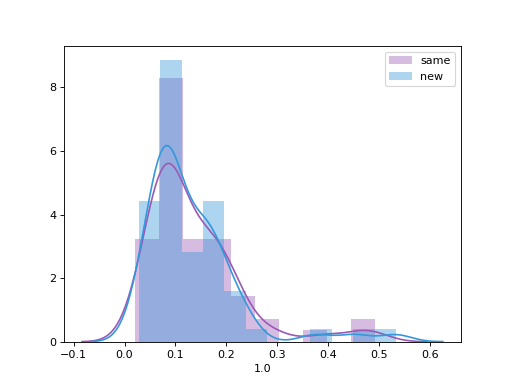

In [55]:
pl.figure()
sns.distplot(mean_novel[0], label='same')
sns.distplot(mean_novel[1], label='new')
pl.legend()



In [31]:
fig_id

'JC113_20191018_FOV1_zoom2p0x_blobs__traces001_df_ROC-0.05-0'

In [26]:
def process_traces(raw_traces, labels, response_type='dff', nframes_post_onset=None):

    stim_on_frame = labels['stim_on_frame'].unique()[0]
    tmp_df = []
    for k, g in labels.groupby(['trial']):
        tmat = raw_traces.loc[g.index]
        bas_mean = np.nanmean(tmat[0:stim_on_frame], axis=0)
        if response_type == 'dff':
            tmat_df = (tmat - bas_mean) / bas_mean
        elif response_type == 'zscore':
            bas_std = np.nanstd(tmat[0:stim_on_frame], axis=0)
            #tmat_df = (tmat - bas_mean) / bas_std
            tmat_df = tmat / bas_std
        tmp_df.append(tmat_df)
    processed_traces = pd.concat(tmp_df, axis=0)
    
    return processed_traces

In [29]:
zscored_traces = process_traces(traces, labels, response_type='zscore', nframes_post_onset=None)

## Plot traces sorted by time

#### Look at traces for 1 cell

In [30]:
curr_trials.groupby(['config']).mean().max()

1        0.161191
4        0.201715
7        0.165767
10       0.282808
44       0.185135
45       0.185997
55       0.261284
56       0.235928
59       0.169965
61       0.128196
63       0.146038
67       0.129493
68       0.151657
70       0.195106
75       0.237423
85       0.339098
88       0.418580
95       0.602496
96       0.268997
98       0.349129
101      1.115476
105      0.086765
108      0.338950
110      0.339577
111      0.132936
117      0.296596
120      0.151574
123      0.204216
124      0.229807
128      0.246998
130      0.289693
132      0.344420
134      0.194777
137      0.193369
138      0.150068
140      0.282257
146      0.171829
151      0.152679
154      0.180769
156      0.182788
158      0.124851
159      0.272217
160      0.192433
161      0.235258
163      0.420772
164      0.153413
165      0.162983
171      0.249813
172      0.233671
175      0.479243
180      0.186632
181      0.142433
187      0.585553
188      0.409456
191      0.362681
194      0

In [32]:
rid = 101
curr_traces = labels.copy()
curr_traces[trace_type] = zscored_traces[rid].copy()
print(curr_traces.shape)
roi_df = curr_trials[[rid, 'config']]


(317250, 9)


In [33]:
trial_df.shape, curr_trials.shape

((2350, 60), (1880, 61))

In [34]:
curr_traces['repnum'] = [-1 for _ in np.arange(0, curr_traces.shape[0])]
for cfg, g in curr_traces.groupby(['config']):
    trial_nums = dict((t, i) for i, t in enumerate(sorted(g['trial'].unique(), key=putils.natural_keys)))
    curr_traces['repnum'][g.index] = [trial_nums[t] for t in g['trial']]
    

/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [35]:
curr_traces['size'] = [sdf['size'][cfg] for cfg in curr_traces['config']]
curr_traces['morphlevel'] = [sdf['morphlevel'][cfg] for cfg in curr_traces['config']]

<IPython.core.display.Javascript object>


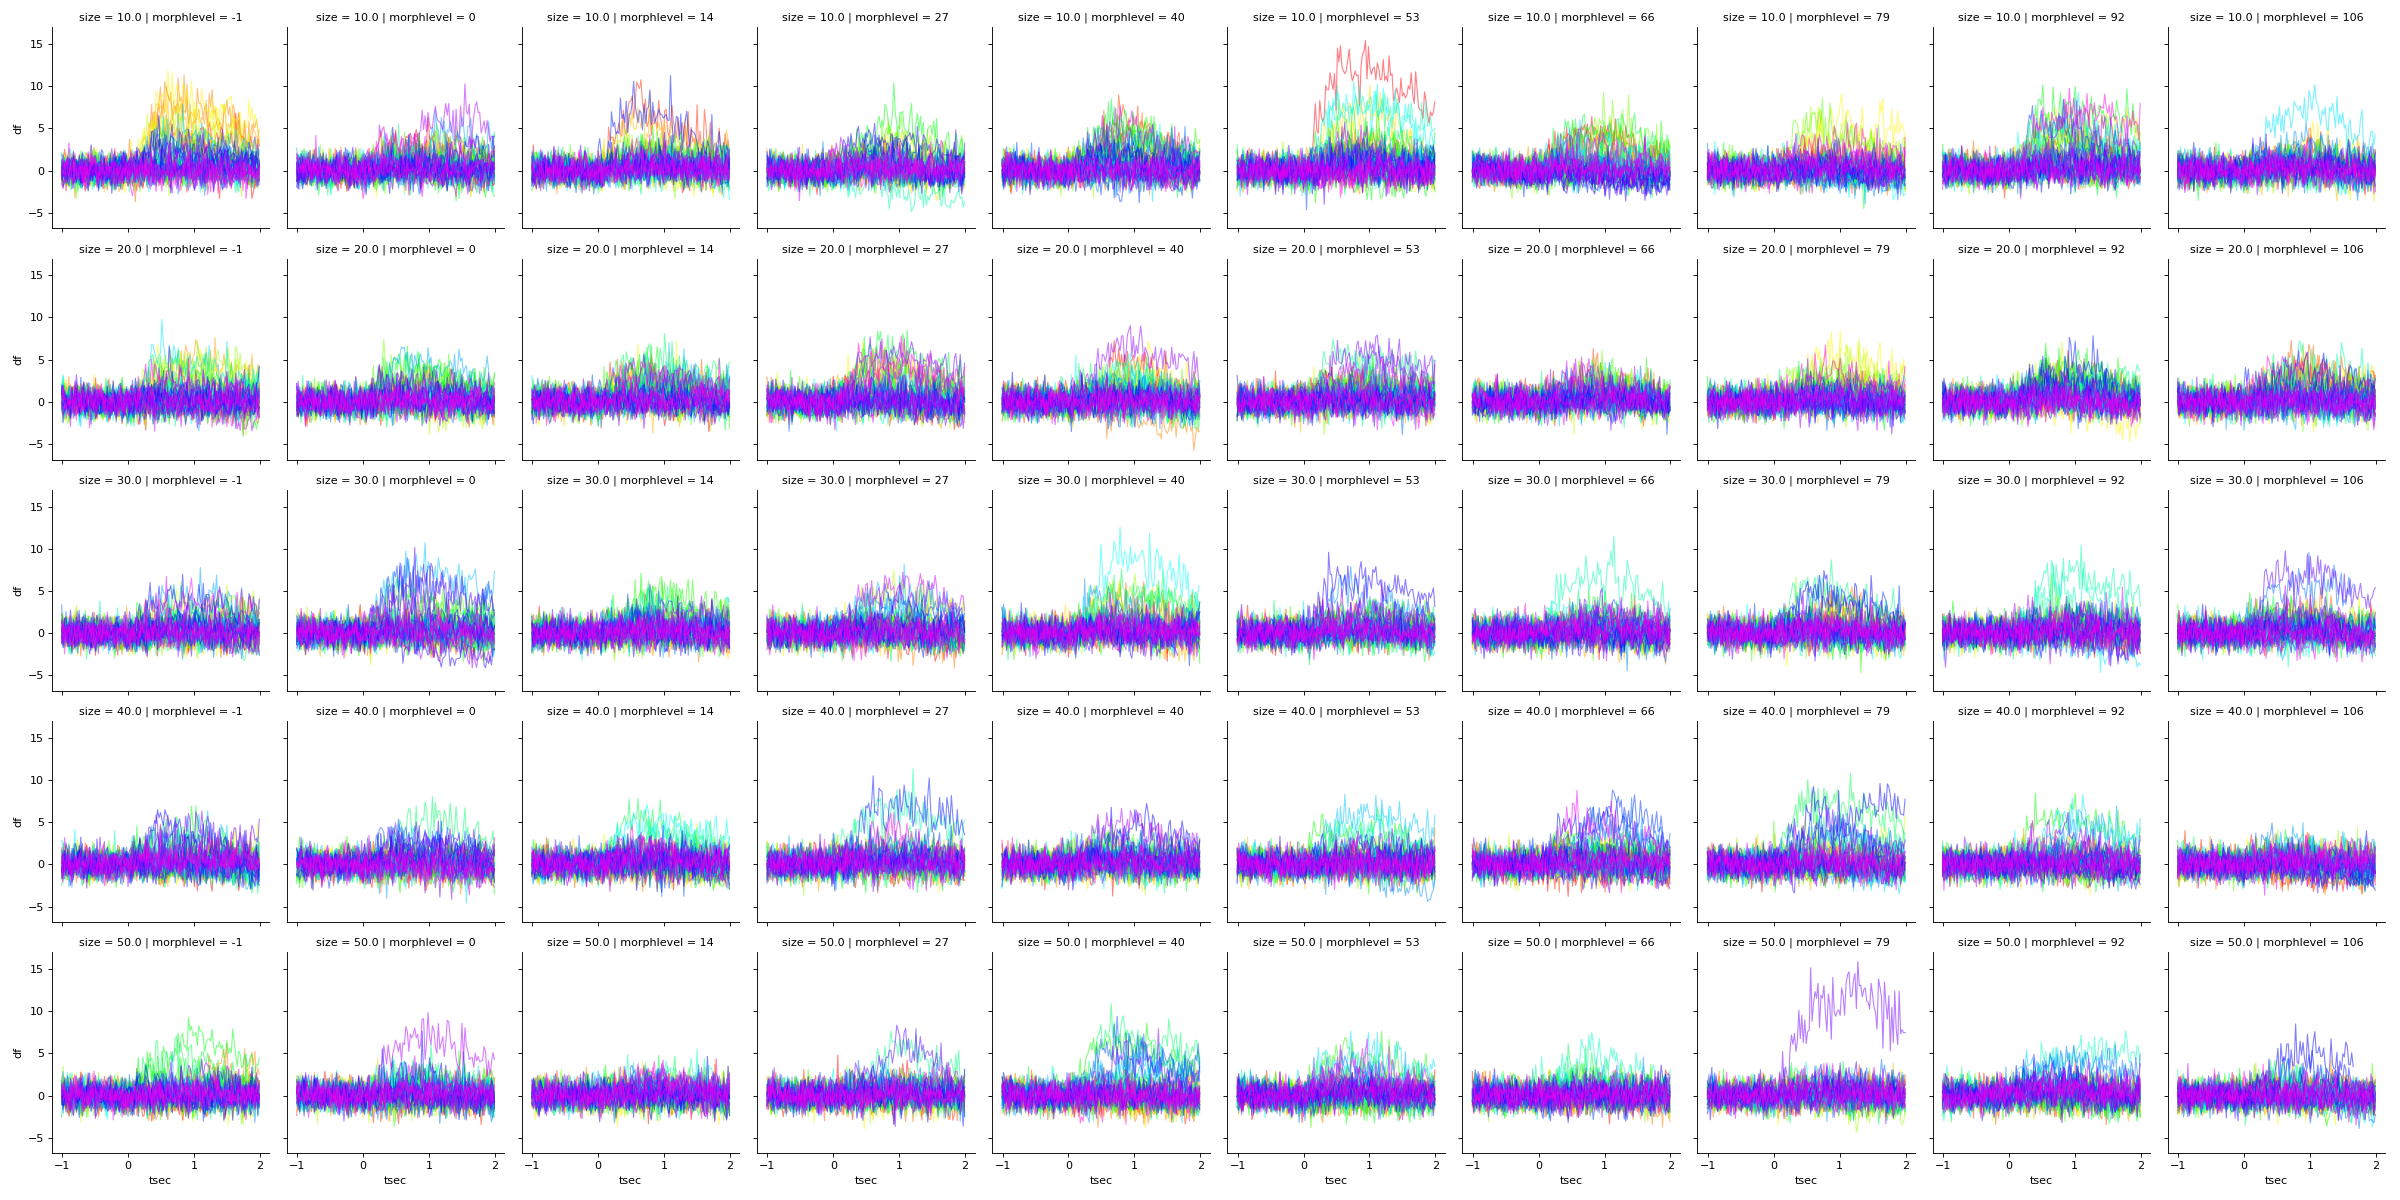

In [36]:

p = sns.FacetGrid(curr_traces, col='morphlevel', row='size', hue='repnum',\
                  sharex=True, sharey=True, palette='gist_rainbow')
p = p.map(pl.plot, "tsec", trace_type, lw=1, alpha=0.5) #, color='k')

<IPython.core.display.Javascript object>


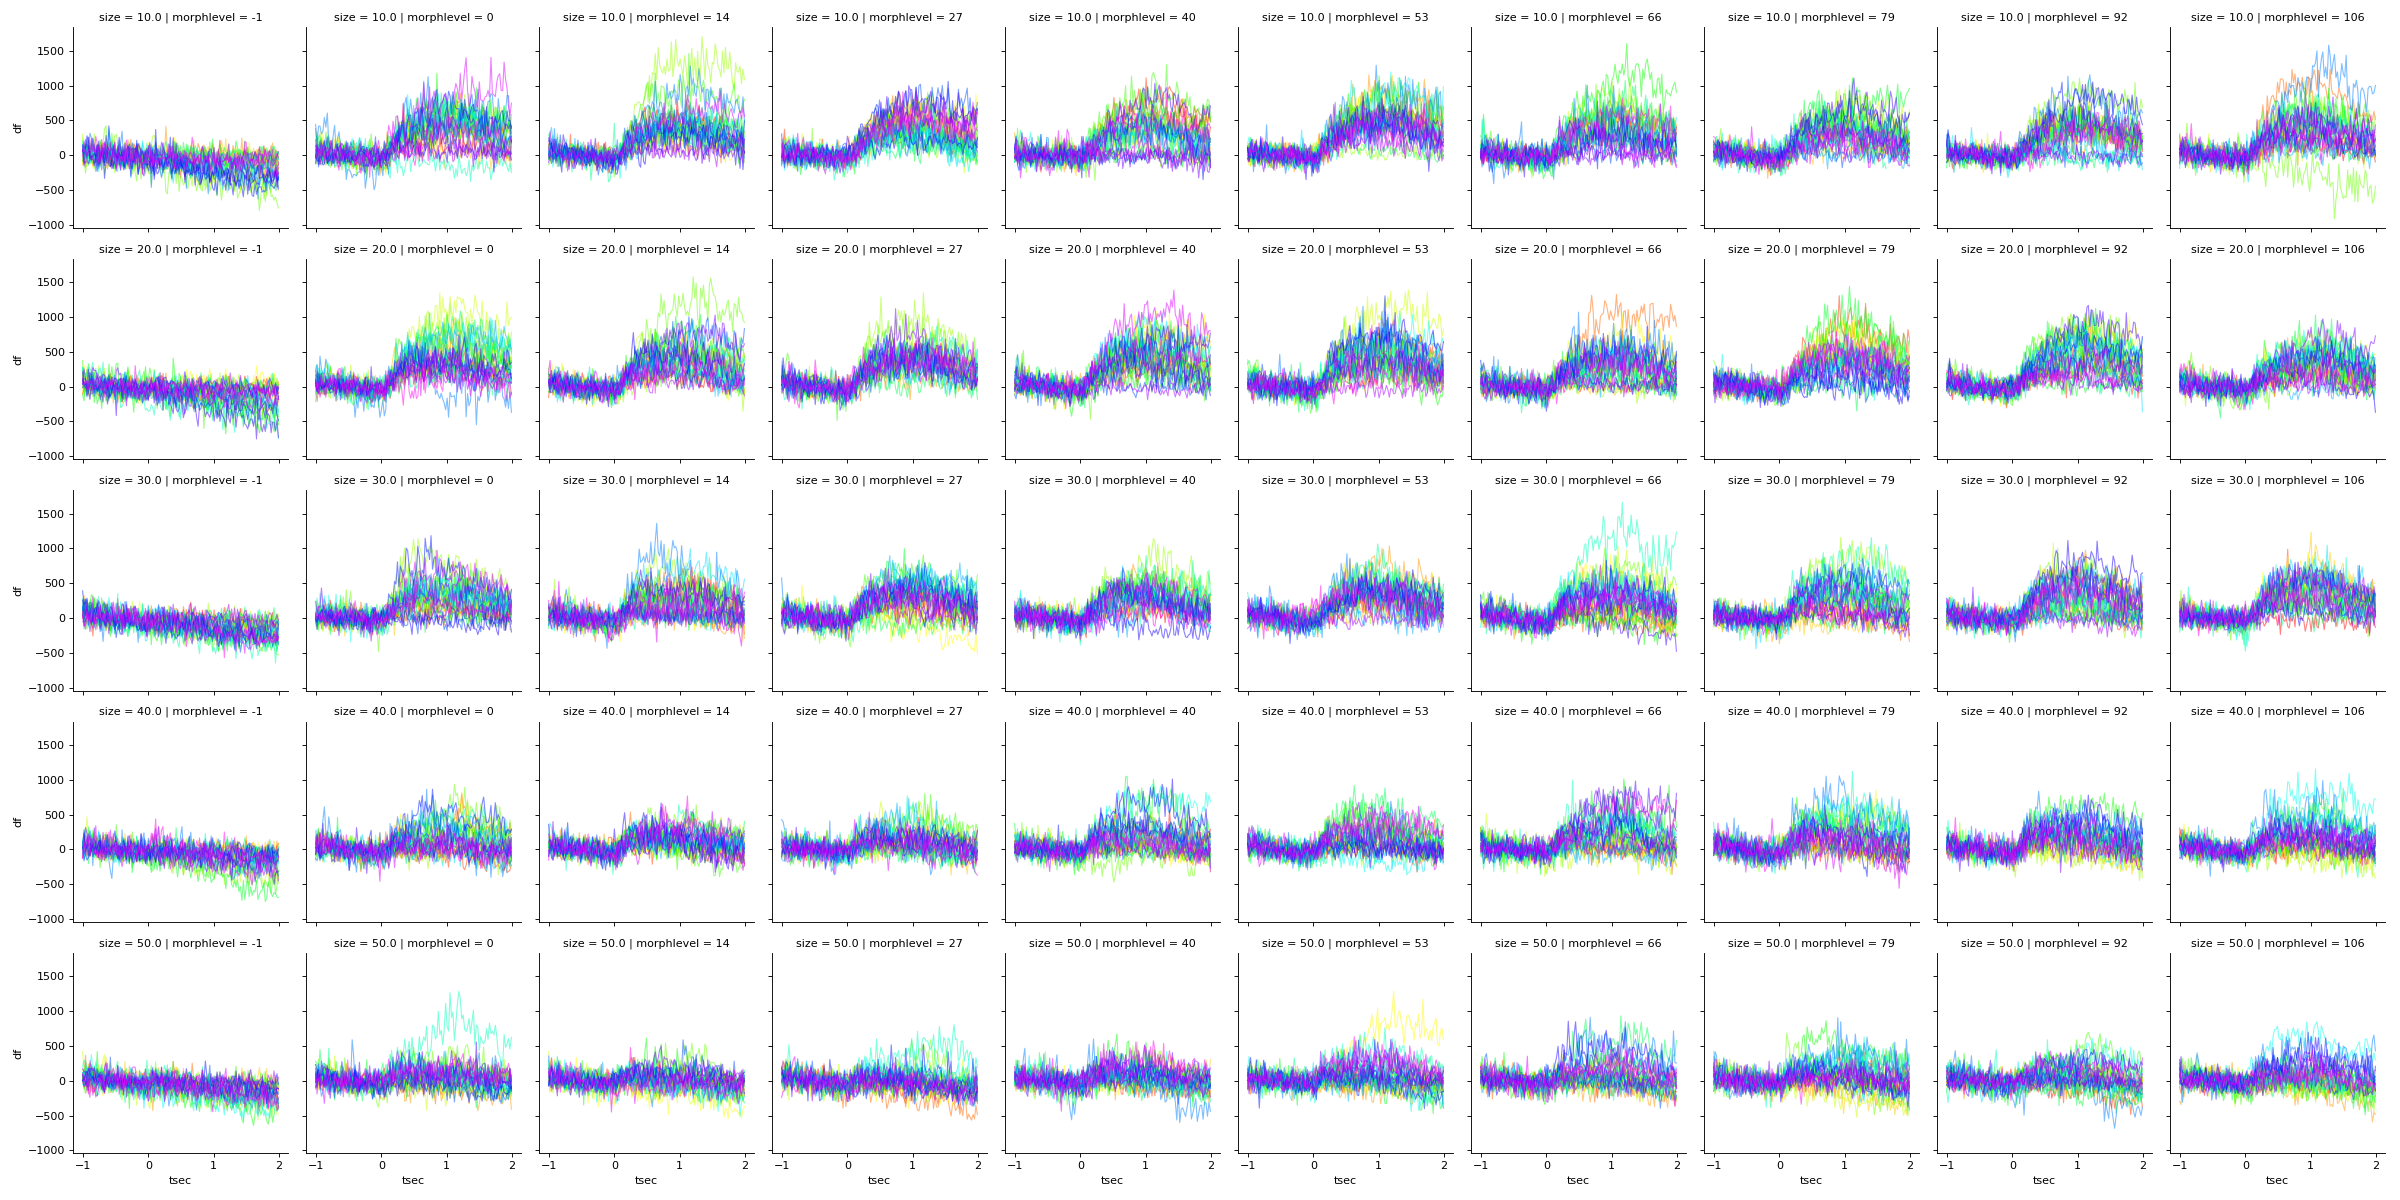

In [271]:

p = sns.FacetGrid(curr_traces, col='morphlevel', row='size', hue='repnum',\
                  sharex=True, sharey=True, palette='gist_rainbow')
p = p.map(pl.plot, "tsec", trace_type, lw=1, alpha=0.5) #, color='k')

In [270]:
#p = p.map(pl.fill_between, "tsec", "fill_minus", "fill_plus", alpha=0.5, color='k')
#p = p.map(pl.plot, "tsec", trace_type, lw=1, alpha=0.5) #, color='k')

In [37]:
sdf['size'].unique()

array([ 10.,  20.,  30.,  40.,  50.])

<IPython.core.display.Javascript object>


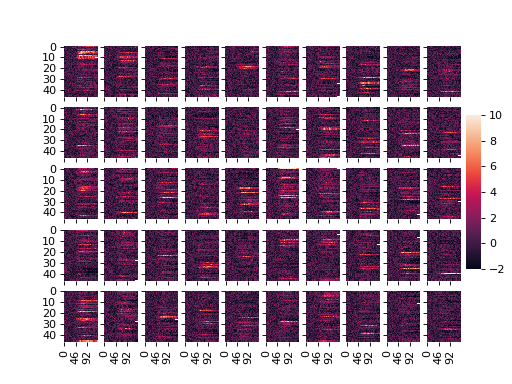

In [38]:
n_sizes = len(sdf['size'].unique())
n_morphs = len(sdf['morphlevel'].unique())

fig, axn = pl.subplots(n_sizes, n_morphs, sharex=True, sharey=True)
cbar_ax = fig.add_axes([0.91, 0.3, 0.03, 0.4])
ai = 0
for (mp, sz), g in curr_traces.groupby(['morphlevel', 'size']):
    ax = axn.flat[ai]
    trial_mat = np.vstack(g.groupby(['trial'])[trace_type].apply(np.array).values)
    sns.heatmap(trial_mat, ax=ax, 
               cbar=ai==0,
               vmin=-2, vmax=10, 
               cbar_ax=None if ai else cbar_ax)
    ai += 1

#### Look at full traces

In [39]:
nframes_on = labels['nframes_on'].unique()[0]
stim_on_frame = labels['stim_on_frame'].unique()[0]

stim_on_ixs = [g.index.tolist()[stim_on_frame] for t, g in labels.groupby(['trial'])]
len(stim_on_ixs)


2350

<IPython.core.display.Javascript object>


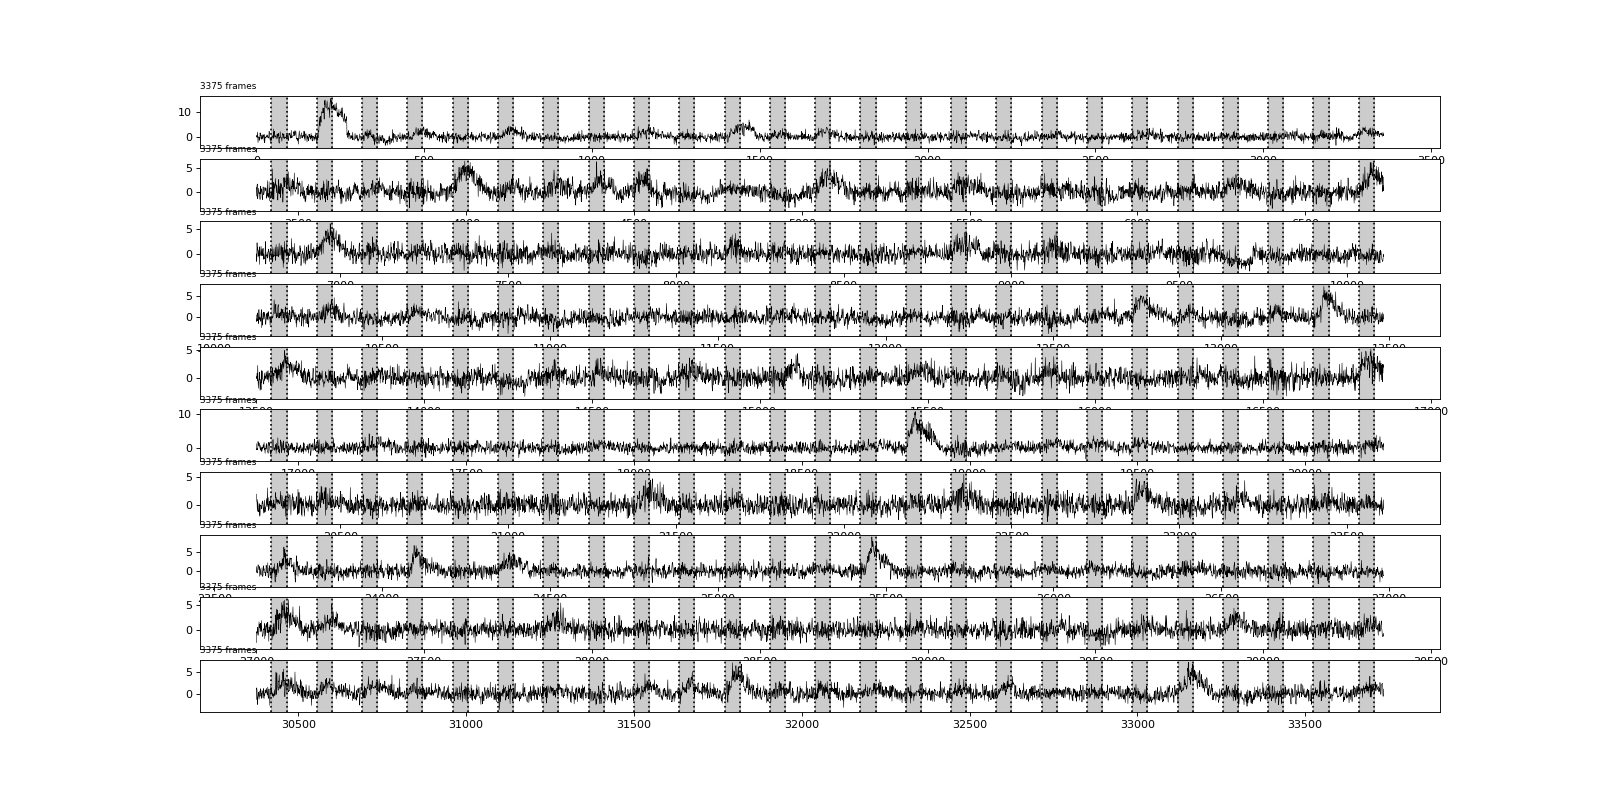

In [40]:
nframes_plot = 5000

nr = 10
fw = 20
fh = nr/2

fig, axn = pl.subplots(nr, 1, figsize=(fw, fh*2))
for ai, ((block_num, tifnun), g) in enumerate(labels.groupby(['run_ix', 'file_ix'])):
    if ai > nr-1:
        continue
    ax = axn[ai]
    ax.plot(g.index, zscored_traces[rid][g.index], lw=.5, color='k')
    ax.set_title('%i frames' % len(g.index), loc='left', fontsize=8)
    curr_stim_ons = [si for si in stim_on_ixs if g.index[0] <= si <= g.index[-1]]
    for si in curr_stim_ons:
        #if si < nframes_plot:
        ax.axvline(x=si, color='k', ls=':')
        ax.axvline(x=si+nframes_on, color='k', ls=':')
        ax.axvspan(si, si+nframes_on, color='k', alpha=0.2)

In [41]:
import h5py

In [42]:
from pipeline.python.paradigm.utils import get_rolling_baseline

In [44]:
# Get extracted traces
fov_dir = os.path.join(rootdir, animalid, session, fov)
rawfns = sorted(glob.glob(os.path.join(fov_dir, '*%s_*' % stimulus, 
                                       'traces', '%s*' % traceid, 'files', '*.hdf5')), key=putils.natural_keys)
print("Found %i raw file arrays." % len(rawfns))


Found 104 raw file arrays.


In [45]:
fpath = rawfns[0]
print(fpath)

/n/coxfs01/2p-data/JC113/20191018/FOV1_zoom2p0x/blobs_run1/traces/traces001_45d7bf/files/File001_rawtraces_45d7bf.hdf5


In [47]:
# Load raw traces from 1 tif
rfile = h5py.File(fpath, 'r')
fdata = rfile['Slice01']
df = pd.DataFrame(fdata['traces']['np_subtracted'][:])


In [48]:
fdata.keys()

[u'frames_indices', u'frames_tsec', u'traces']

In [49]:
fdata['traces'].keys()

[u'neuropil', u'np_subtracted', u'raw']

In [50]:
# Detrend raw traces
window_size_sec = 30.
quantile = 0.10
framerate = run_info['framerate']
quantile= 0.10
windowsize = window_size_sec*framerate

detrended_df, F0_df = get_rolling_baseline(df, windowsize, quantile=quantile)


('drift offset:', 111.10648893801994)


In [51]:
parsed_frames_fpath = glob.glob(os.path.join(fpath.split('/traces')[0], 'paradigm', 'parsed_frames_*.hdf5'))[0] #' in pfn][0]
print(parsed_frames_fpath)
parsed_frames = h5py.File(parsed_frames_fpath, 'r')

trial_list = sorted(parsed_frames.keys(), key=putils.natural_keys)
print "There are %i total trials across all .tif files." % len(trial_list)

stim_onset_idxs = np.array([pf['frames_in_file'].attrs['stim_on_idx'] \
                            for t, pf in parsed_frames.items()])


/n/coxfs01/2p-data/JC113/20191018/FOV1_zoom2p0x/blobs_run1/paradigm/parsed_frames_89fffa.hdf5
There are 250 total trials across all .tif files.


<IPython.core.display.Javascript object>


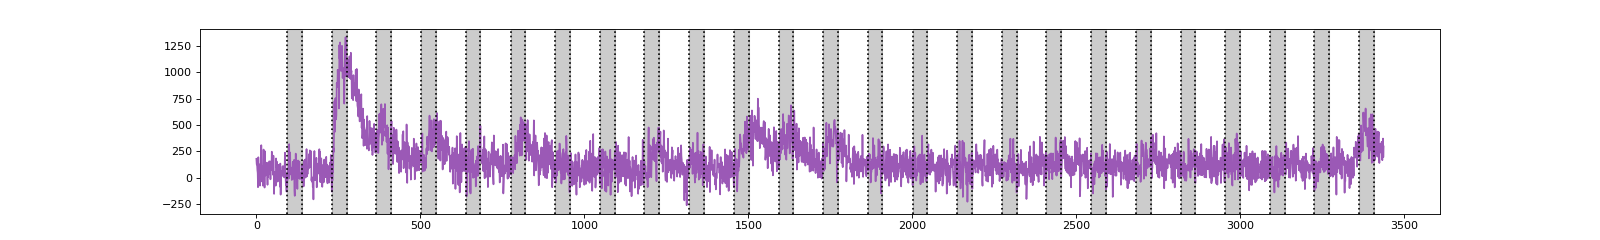

In [54]:
fig, ax = pl.subplots(figsize=(20,3))
ax.plot(detrended_df[rid])

curr_stim_ons = [si for si in stim_onset_idxs if detrended_df.index[0] <= si <= detrended_df.index[-1]]
for si in curr_stim_ons:
    #if si < nframes_plot:
    ax.axvline(x=si, color='k', ls=':')
    ax.axvline(x=si+nframes_on, color='k', ls=':')
    ax.axvspan(si, si+nframes_on, color='k', alpha=0.2)

In [414]:
detrended_df.head()

0          1           2           3          4          5    \
0  42.817088  51.636091   67.929937   24.705043  -9.021129  42.730053   
1  44.809219 -31.025330  104.483601   90.616898  64.751689  20.337299   
2  -9.077793  14.991266   33.384581   31.621040  11.490755  93.617042   
3  11.847822  28.198211   41.551613   84.279729  28.565195  45.793595   
4  50.215240  86.393348   47.858373  122.938619 -10.653042  95.827136   

          6           7           8          9       ...            224  \
0   46.495539   52.175423  -10.172592  45.226687     ...      46.884977   
1   60.882533   12.299487  178.004624  54.307500     ...      63.579834   
2  121.809237   -7.383227   81.602064  52.472307     ...     -41.264733   
3    7.366027   90.129394  -55.731906  93.845145     ...     -29.026558   
4   63.470400  215.749976  102.922245  89.471966     ...      86.592208   

          225         226         227         228         229         230  \
0  124.664009  155.724470   77.936312  306.371561  146.236605  167.541536   
1   15.198329   81.811879  -18.770784  121.138252   84.960056  229.681863   
2  197.266425  141.708991  290.731640  171.541056   30.267626  320.619382   
3  215.938657  114.522070  -57.180868  190.811774  -85.818572  126.386109   
4  285.446375   93.968074  -24.334481   69.260596  127.796462   62.309974   

          231         232         233  
0   31.716014   46.064373  148.204904  
1  258.122207  219.995358  199.141179  
2  210.181417   36.427731   40.181112  
3   34.321162    0.487804  120.960346  
4  137.250270  -68.397938  112.749926  

[5 rows x 234 columns]

In [409]:
fpath

'/n/coxfs01/2p-data/JC117/20191105/FOV1_zoom2p0x/blobs_run1/traces/traces001_1621ed/files/File001_rawtraces_1621ed.hdf5'

In [412]:
stim_onset_idxs

array([   94,   230,   506,   642,   778,   915,  1051,  1187,  1323,
        1460,  1596,  1732,  1868,  2005,  2141,  2277,  2413,  2550,
        2686,  2822,  2958,  3095,  3231,  3367,  3532,  3668,  3805,
        3941,  4077,  4214,  4350,  4486,  4622,  4758,  4895,  5031,
        5167,  5303,  5440,  5576,  5712,  5849,  5985,  6121,  6257,
        6393,  6530,  6666,  6802,  6970,  7106,  7242,  7378,  7515,
        7651,  7787,  7924,  8060,  8196,  8332,  8469,  8605,  8741,
        8877,  9014,  9150,  9286,  9422,  9559,  9695,  9831,  9967,
       10103, 10240, 10408, 10544, 10681, 10817, 10953, 11089, 11226,
       11362, 11498, 11635, 11771, 11907, 12043, 12179, 12316, 12452,
       12588, 12724, 12861, 12997, 13133, 13269, 13406, 13542, 13678,
       13846, 13982, 14118, 14255, 14391, 14527, 14663, 14800, 14936,
       15072, 15208, 15345, 15481, 15617, 15754, 15890, 16026, 16162,
       16298, 16435, 16571, 16707, 16843, 16980, 17116, 17284, 17420,
       17556, 17693,